# Лабораторная работа №2

ФИО:   
Группа: 

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [6]:
import pandas as pd
data = pd.read_csv("/Users/cene/homework_ai/data/student-por.csv")

In [8]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 2. Описание постановки задачи

In [ ]:
'''
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)'''

## 3. Распределение целевой переменной

Количество уникальных значений в целевой переменной: 17
G3
0      15
1       1
5       1
6       3
7      10
8      35
9      35
10     97
11    104
12     72
13     82
14     63
15     49
16     36
17     29
18     15
19      2
Name: count, dtype: int64


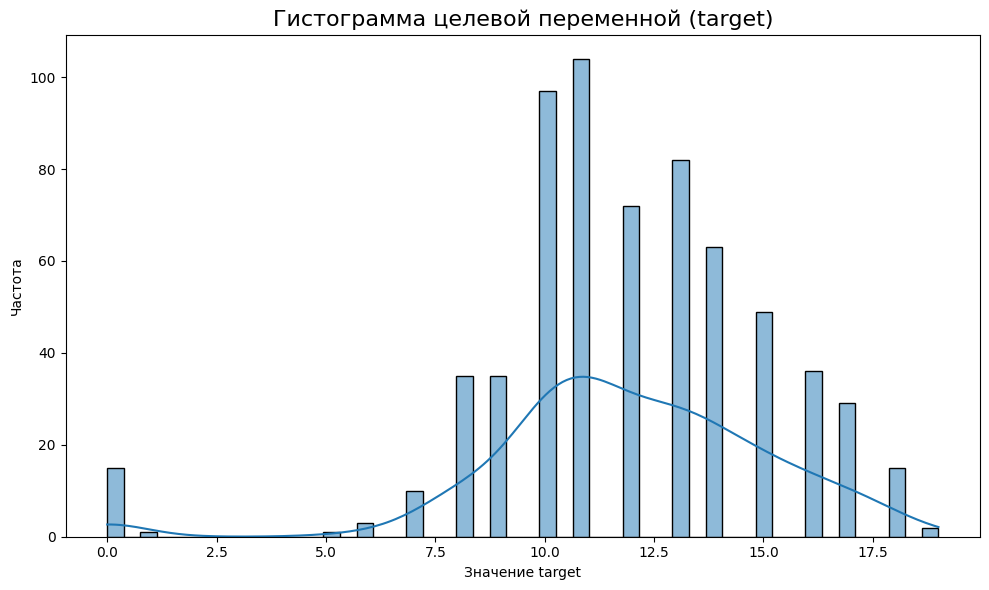

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

unique_count = data['G3'].nunique()
print(f"Количество уникальных значений в целевой переменной: {unique_count}")
print(data['G3'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], bins=50, kde=True)
plt.title('Гистограмма целевой переменной (target)', fontsize=16)
plt.xlabel('Значение target')
plt.ylabel('Частота')


plt.tight_layout()
plt.show()

## 4. Выведите основные статистики по переменным в датасете

In [14]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## 5. Выведите основную информацию по датасету

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## 6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках.

In [17]:
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


## 7. Постройте гистограммы 5 любых признаков 

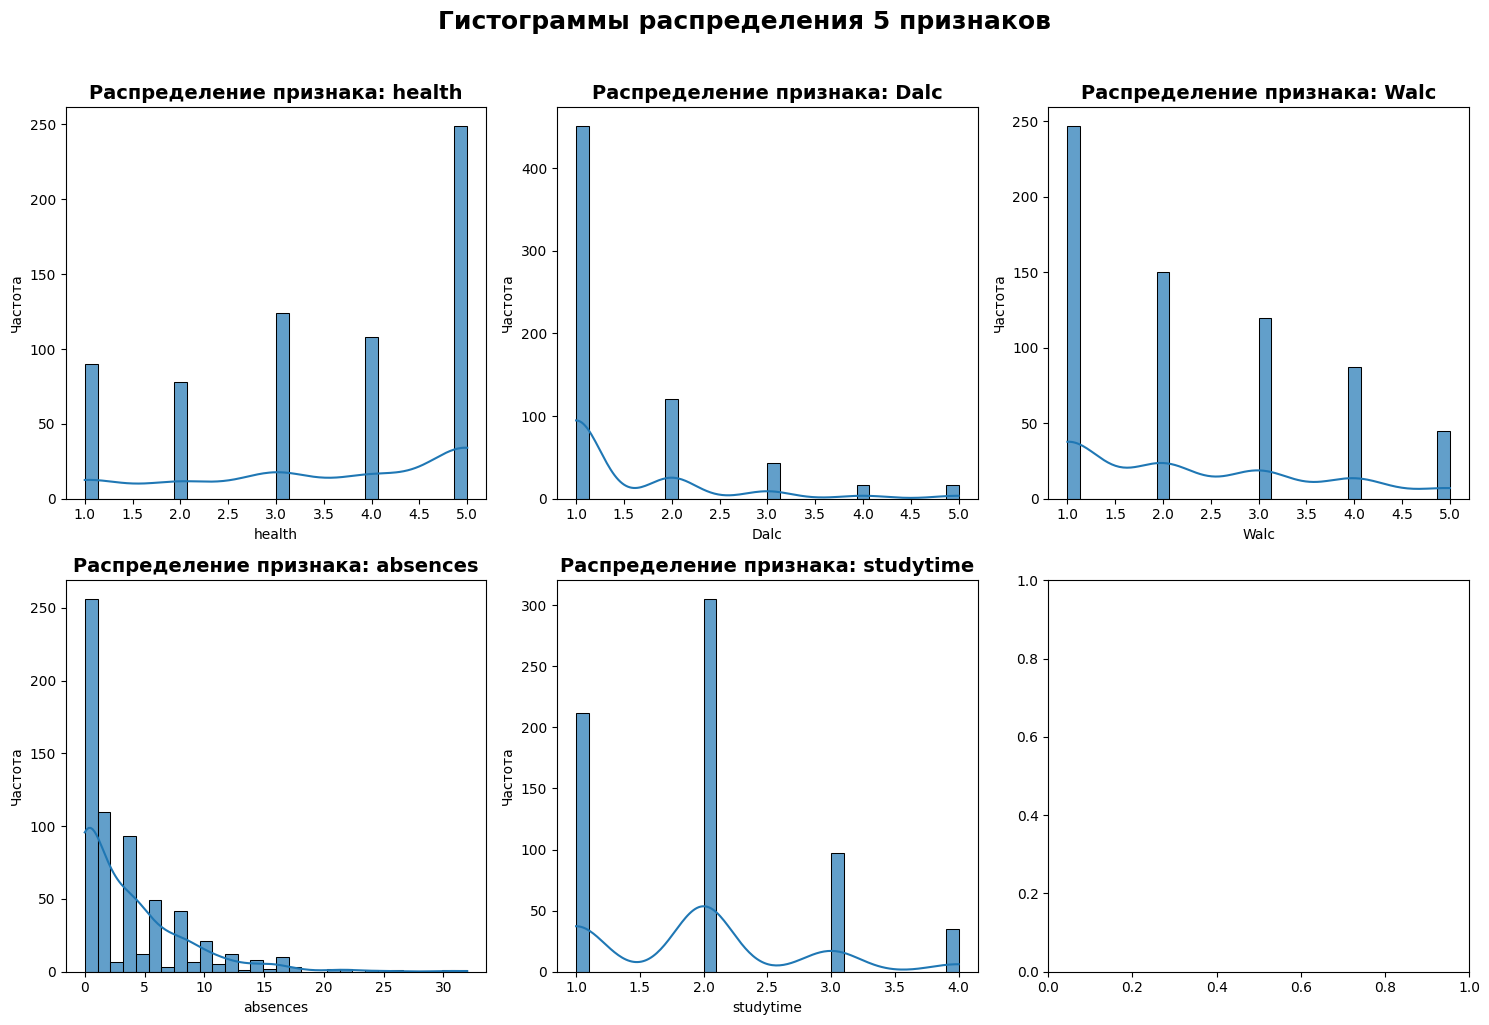

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = [
    'health', 'Dalc', 'Walc', 'absences', 'studytime'
] 

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel() 

for i, col in enumerate(features_to_plot):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i], bins=30, alpha=0.7)
    axes[i].set_title(f'Распределение признака: {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.suptitle('Гистограммы распределения 5 признаков', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной 

/var/folders/p1/1rpwgxjn6xz8wnkmk4ls3jg00000gn/T/ipykernel_10899/4059404902.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


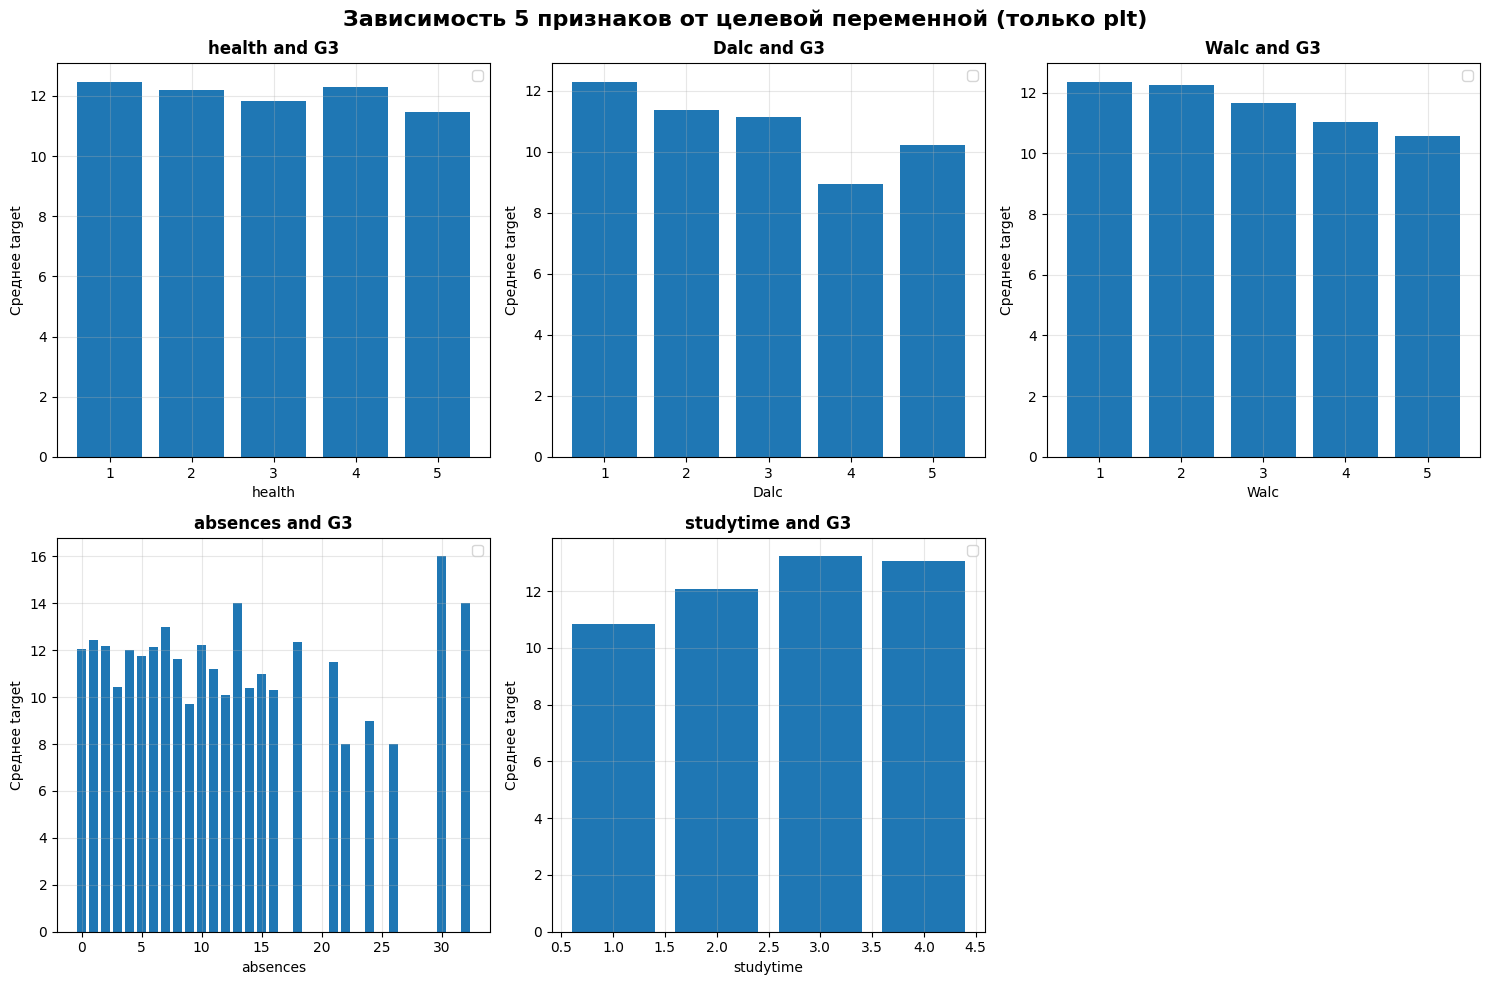

In [37]:
import matplotlib.pyplot as plt
import numpy as np
target = 'G3'  
features = [
    'health', 'Dalc', 'Walc', 'absences', 'studytime'
]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feat in enumerate(features):
    ax = axes[i]
    
    x = data[feat]
    y = data[target]
    
    # Определяем тип задачи
    is_classification = y.nunique() <= 10
    
    # Категориальный признак
    categories = x.unique()
    means = [y[x == cat].mean() if is_classification else y[x == cat].mean() 
                for cat in categories]
    ax.bar(categories, means)
        
    ax.set_title(f'{feat} and {target}', fontweight='bold')
    ax.set_xlabel(feat)
    ax.set_ylabel('Количество' if is_classification else 'Среднее target')
    
    
    ax.legend()
    ax.grid(True, alpha=0.3)

fig.delaxes(axes[5])

plt.suptitle('Зависимость 5 признаков от целевой переменной (только plt)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
# у absences и studytime связь сильна